In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from engine import Value
from nn import MLP

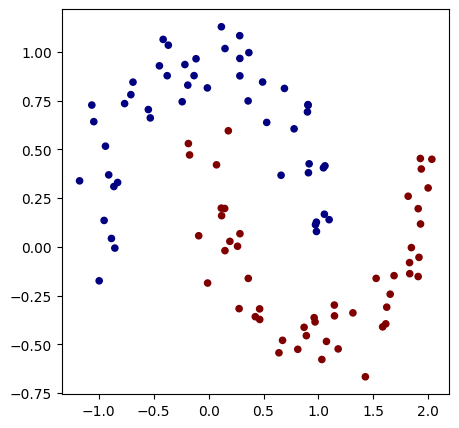

In [3]:
from sklearn.datasets import make_moons, make_blobs

# generate synthetic data of two cresent moons with some random noise
X, y = make_moons(n_samples = 100, noise = 0.1)

# label adjustment, (0, 1) -> (-1, 1)
y = 2*y - 1 

plt.figure(figsize = (5, 5))
plt.scatter(X[:, 0], X[:, 1], c = y, s = 20, cmap = 'jet')

In [4]:
model = MLP(2, [16, 16, 1])
print(model)
print(f'Number of parameters = {len(model.parameters())}')

MLP(3 Layers)
Number of parameters = 337


In [5]:
def loss(batch_size = None):
    if batch_size is None:
        Xb, yb = X, y
    else:
        ri = np.random.permutation(X.shape[0])[:batch_size]
        Xb, yb = X[ri], y[ri]
        
    inputs = [list(map(Value, xrow)) for xrow in Xb]
    scores = list(map(model, inputs))

    # svm max-margin loss (used in classifier models)
    losses = [(1 - yi*scorei).relu() for yi, scorei in zip(yb, scores)]
    data_loss = sum(losses) * 1.0/len(losses)
    # L2 regularization
    alpha = 1e-4 # regularilzation strength
    reg_loss = alpha * sum([p*p for p in model.parameters()]) # penalize high weights to avoid overfitting

    total_loss = data_loss + reg_loss
    accuracy = [(yi > 0) == (scorei.data > 0) for yi, scorei in zip(yb, scores)]

    return total_loss, sum(accuracy) / len(accuracy)


In [7]:
for k in range(100):
    # forward pass
    total_loss, acc = loss()
    # compute gradients
    model.zero_grad()
    total_loss.backward()
    # adjust weights
    learning_rate = 1 - 0.9*k/100
    
    for p in model.parameters():
        p.data -= learning_rate * p.grad

    print(f'step = {k + 1}, loss = {total_loss.data}, accuracy = {acc * 100}%')

step = 1, loss = 0.5747062681691989, accuracy = 74.0%
step = 2, loss = 0.4019250202306903, accuracy = 80.0%
step = 3, loss = 0.3797173233127186, accuracy = 82.0%
step = 4, loss = 0.3465797637736478, accuracy = 86.0%
step = 5, loss = 0.3247758123639314, accuracy = 86.0%
step = 6, loss = 0.310692346983797, accuracy = 86.0%
step = 7, loss = 0.2988885164263173, accuracy = 87.0%
step = 8, loss = 0.28748297089809033, accuracy = 88.0%
step = 9, loss = 0.27843683548247034, accuracy = 89.0%
step = 10, loss = 0.27747488385703484, accuracy = 88.0%
step = 11, loss = 0.28634145070452166, accuracy = 86.0%
step = 12, loss = 0.2966685157766901, accuracy = 86.0%
step = 13, loss = 0.2569422236188324, accuracy = 91.0%
step = 14, loss = 0.25231208198561933, accuracy = 89.0%
step = 15, loss = 0.2608545842112819, accuracy = 88.0%
step = 16, loss = 0.2657512120958462, accuracy = 86.0%
step = 17, loss = 0.26467321044824027, accuracy = 88.0%
step = 18, loss = 0.2415641105600231, accuracy = 89.0%
step = 19, los

(-1.665759865795427, 2.084240134204573)

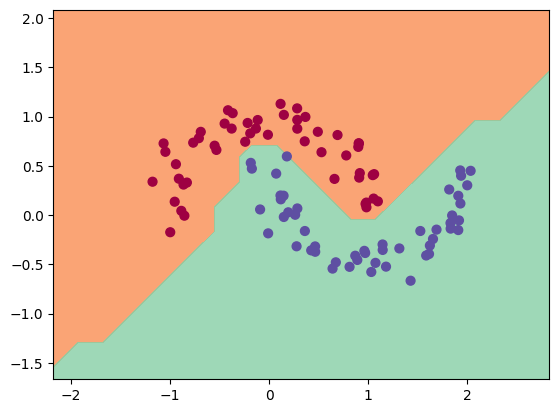

In [36]:
# visualize decision boundary

h = 0.25
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Xmesh = np.c_[xx.ravel(), yy.ravel()]
inputs = [list(map(Value, xrow)) for xrow in Xmesh]
scores = list(map(model, inputs))
Z = np.array([s.data > 0 for s in scores])
Z = Z.reshape(xx.shape)

fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())


In [11]:
np.arange(x_min, x_max, h)

array([-2.17433666, -1.92433666, -1.67433666, -1.42433666, -1.17433666,
       -0.92433666, -0.67433666, -0.42433666, -0.17433666,  0.07566334,
        0.32566334,  0.57566334,  0.82566334,  1.07566334,  1.32566334,
        1.57566334,  1.82566334,  2.07566334,  2.32566334,  2.57566334,
        2.82566334])

In [12]:
np.arange(y_min, y_max, h)

array([-1.66575987, -1.41575987, -1.16575987, -0.91575987, -0.66575987,
       -0.41575987, -0.16575987,  0.08424013,  0.33424013,  0.58424013,
        0.83424013,  1.08424013,  1.33424013,  1.58424013,  1.83424013,
        2.08424013])

In [21]:
Xmesh = np.c_[xx.ravel(), yy.ravel()]

In [22]:
inputs = [list(map(Value, xrow)) for xrow in Xmesh]
scores = list(map(model, inputs))
Z = np.array([s.data > 0 for s in scores])

In [34]:
Z = Z.reshape(xx.shape)

In [35]:
Z

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True],
       [False,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True],
       [False, False, False,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True],
       [False, False, False, False,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True],
       [False, False, False, False, False,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True],
       [False, False, False, False, False, False,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True